# Importing Libraries and Data

In [1]:
import pandas as pd
from datasets import load_dataset
the_lukbarset=load_dataset('lukebarousse/data_jobs')
data_fram=the_lukbarset['train'].to_pandas()
data_fram['job_posted_date']=pd.to_datetime(data_fram.job_posted_date)
data_fram
data_fram1=data_fram.copy()
import ast
import matplotlib.pyplot as plt
import seaborn as sns
data_fram1['job_skills']=data_fram1['job_skills'].apply(lambda skill:ast.literal_eval(skill) if pd.notna(skill) else skill)
data_fram1=data_fram1[data_fram1['job_country']=='India']


# Top paying Jobs and skills for Data Analyst

## Median Salary for top paying jobs

### The top paying jobs

In [2]:
data_fram2=data_fram1.copy()
data_fram2['salary_year_avg']=data_fram2['salary_year_avg'].dropna()

top_job_titles=data_fram2.groupby('job_title_short')['salary_year_avg'].agg('median').drop('Cloud Engineer').head(5).index.to_list()
top_job_titles

['Business Analyst',
 'Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Machine Learning Engineer']

### Box plot for the top 3 job salaries 

In [3]:

container=[]
for job in top_job_titles:
    container.append(data_fram2[data_fram2['job_title_short']==job]['salary_year_avg'].values)

(0.0, 600000.0)

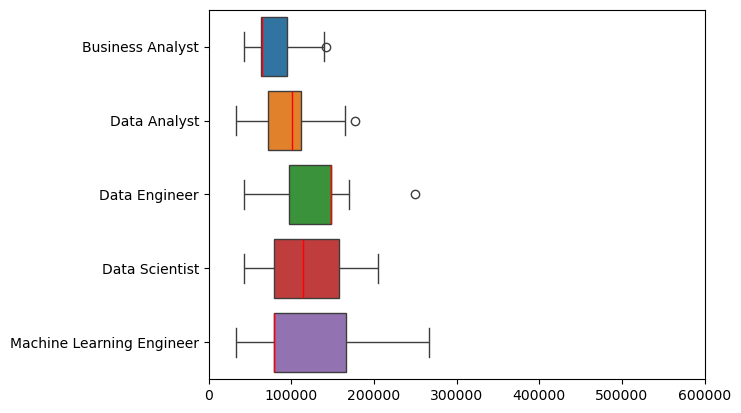

In [ ]:
sns.boxplot(data=container,orient='h',medianprops=dict(color='red', linewidth=1))
plt.yticks(ticks=range(0,len(top_job_titles)),labels=top_job_titles)
plt.xlim(0,600000)




In [5]:
data_fram2[(data_fram2['job_title_short']=='Data Analyst')& (data_fram2['salary_year_avg']>600000)] # the outlier

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
168402,Data Analyst,Data Analyst,Anywhere,via Y Combinator,Full-time,True,India,2023-02-20 15:13:44,True,False,India,year,650000.0,NaN,Mantys,None,None


## Top Skills for Data Analytics and there pay 

In [6]:
data_fram_skills=data_fram1.copy()
data_fram_skills=data_fram_skills[data_fram_skills['job_title_short']=='Data Analyst']
data_fram_skills=data_fram_skills.explode('job_skills')
data_fram_skills=data_fram_skills.dropna(subset='salary_year_avg')


### Selecting the top skills used in Data Analyst Jobs in India

In [7]:
top_trending_skills=data_fram_skills['job_skills'].value_counts()
top_trending_skills=top_trending_skills.head(5).index.to_list()
top_trending_skills



['sql', 'excel', 'python', 'tableau', 'r']

### Plotting the box plot

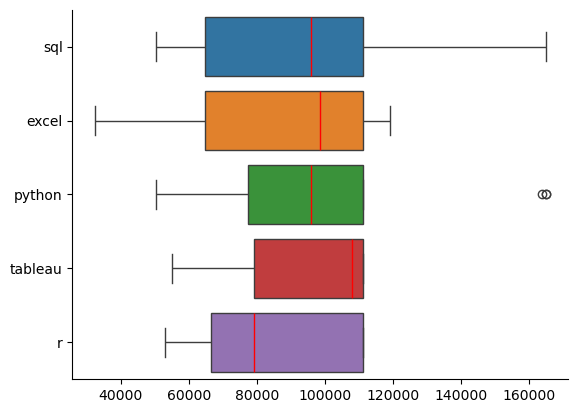

In [8]:
container2=[]
for x in top_trending_skills: 
   container2.append(data_fram_skills[data_fram_skills['job_skills']==x]['salary_year_avg'].values)

sns.boxplot(data=container2,orient='h',medianprops=dict(color='red', linewidth=1))
plt.yticks(ticks=range(0,len(top_trending_skills)),labels=top_trending_skills)
sns.despine()

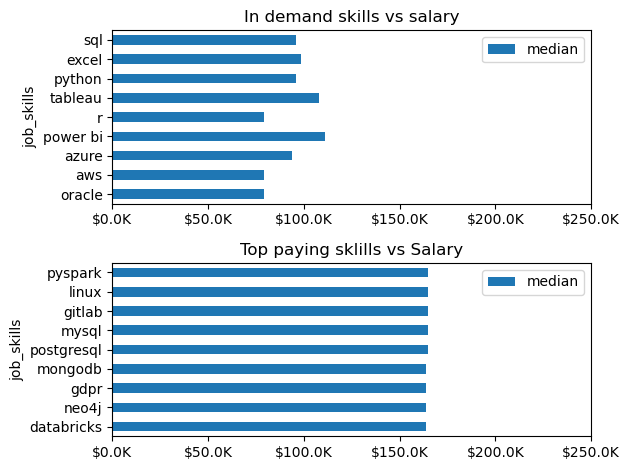

In [17]:
imp_datafram=data_fram_skills[['job_skills','salary_year_avg']].dropna(subset='salary_year_avg')
req_table=imp_datafram.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
skill_indemand=req_table.sort_values(by='count',ascending=False).head(9)

top_10paying=req_table.sort_values(by='median',ascending=False).head(9)
import matplotlib.pyplot as plt
import matplotlib.ticker as FunkFormatter
fig , ax=plt.subplots(2,1)
skill_indemand.plot(kind='barh',y='median',ax=ax[0])
top_10paying.plot(kind='barh',y='median',ax=ax[1],xlim=(0,250000))
ax[0].set_title('In demand skills vs salary')
ax[1].set_title('Top paying sklills vs Salary')
ax[0].set_xlim(ax[1].get_xlim())
ax[0].invert_yaxis()
ax[1].invert_yaxis()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_ : f'${x/1000}K'))
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_ : f'${x/1000}K'))

plt.tight_layout()

In [16]:
req_table.sort_values(by='median',ascending=False).head(10)

,count,median
job_skills,,
pyspark,1,165000.0
linux,1,165000.0
gitlab,1,165000.0
mysql,1,165000.0
postgresql,1,165000.0
mongodb,6,163782.0
gdpr,2,163782.0
neo4j,1,163782.0
databricks,3,163782.0
